# AI3
## This is project No.3 and it's being worked with Naives Bayes Classifier

### Introduction
In this project, we intend to analyze the articles of Digitala Mag site using Classifier Bayes Naive and categorize them, and try to predict its classification using the data we have about the description of each article.

### Import libs and define constants
Import `hazm` for data preprocessing<br/>
Import `stop_words` from `farsi_tools` to ignore persian stop words

In [134]:
from hazm import *
from __future__ import unicode_literals
import pandas as pd 
from farsi_tools import stop_words
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean

pd.options.mode.chained_assignment = None  # default='warn'

PREDICTION_LABEL = "prediction_label"
CORRECT_LABEL = "correct_label"
LABEL = "label"
CONTENT = "content"

TRAINING_SET = "train.csv"
TESTING_SET = "test.csv"
CHARS_SET = "chars.txt"

ZERO = 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001

### Read train.csv and test.csv

In [135]:
df_train = pd.read_csv(TRAINING_SET)
df_train

,content,label
0,فیلم‌های در حال اکران؛ موزیکال شاد خاله قورباغ...,هنر و سینما
1,پنج فیلمسازی که کوئنتین تارانتینو را عاشق سینم...,هنر و سینما
2,جانی آیو از اپل رفت جانی آیو دیگر نیازی به معر...,علم و تکنولوژی
3,احتمال عدم پشتیبانی iOS ۱۳ از آیفون ۵ اس، SE و...,علم و تکنولوژی
4,دزدان مغازه نماینده ژاپن در اسکار ۲۰۱۹ شد فیلم...,هنر و سینما
...,...,...
5195,امپراطوری اپ (فصل اول/بخش دوم) فصل اول – بخش د...,سلامت و زیبایی
5196,عدم ارتباطات اثربخش و تعارض در محیط کار وجود س...,سلامت و زیبایی
5197,اپل در سال ۲۰۲۰ چهار آیفون معرفی خواهد کرد! طب...,علم و تکنولوژی
5198,مارتینز: بلژیک باید مقابل فرانسه بدون ترس بازی...,سلامت و زیبایی


In [136]:
df_test = pd.read_csv(TESTING_SET)
df_test

,content,label
0,با این ۵ صبحانه رژیمی لاغر شوید صبحانه همیشه ب...,سلامت و زیبایی
1,نمایشگر گوشی تاشونده ال‌جی مانند بروشور باز و ...,علم و تکنولوژی
2,چرا برخی سلبریتی‌های هالیوودی از شبکه‌های اجتم...,هنر و سینما
3,گوگل استیدیا؛ آینده‌ی صنعت بازی یا محکوم به شک...,بازی ویدیویی
4,ویژگی جذاب گلکسی Z Flip به زودی به گوشی‌های ان...,علم و تکنولوژی
...,...,...
797,برادران داردن با فیلمی درباره افراطی‎گری به کن...,هنر و سینما
798,Death Stranding پر از میان‌پرده‌های طولانی است...,بازی ویدیویی
799,حالت نیو گیم پلاس به اسپایدرمن اضافه می‌شود چن...,بازی ویدیویی
800,چگونه مثل جف بزوس هک نشویم؛ ۵ توصیه امنیتی برا...,علم و تکنولوژی


# Phase One: Data Preprocessing
-------------------------

## Q1: Replacing words with stemming or lemmatization definitations?
`sent_tokenize ` can be used for separate sentences.<br/>
`stemmer` can be used for taking root of words but we don't use this; because it sometimes doesn't work correctly for some of the words in our data.<br/>
`lemmatizer`can be used for get past and present roots of verbs and it's being used in project.<br/>
`word_tokenize` can be used for tokenize the word and it's being used in project.<br/>

In [137]:
lemmatizer = Lemmatizer()
print(lemmatizer.lemmatize("می‌رسانند"))
print(lemmatizer.lemmatize("می‌رود"))
print(lemmatizer.lemmatize("برو"))
print(lemmatizer.lemmatize("نمی‌شود"))
print(lemmatizer.lemmatize("می‌برد"))
print(lemmatizer.lemmatize("خسته"))
print(lemmatizer.lemmatize("اطلاعات"))
print(lemmatizer.lemmatize("خصوصا"))
print(lemmatizer.lemmatize("گرسنه‌تر"))
print(lemmatizer.lemmatize("سپرد"))
print(lemmatizer.lemmatize("سپردن"))

رساند#رسان
رفت#رو
برو
شد#شو
برد#بر
خسته
اطلاعات
خصوصا
گرسنه
سپرد#سپر
سپردن


In [138]:
stemmer = Stemmer()
print(stemmer.stem("کجایی"))
print(stemmer.stem("میای"))
print(stemmer.stem("میری"))
print(stemmer.stem("نمیری"))
print(stemmer.stem("اطلاعات"))
print(stemmer.stem("می‌برد"))
print(stemmer.stem("اینترنت"))
print(stemmer.stem("گوگل"))
print(stemmer.stem("سپردن"))

کجا
میا
میر
نمیر
اطلاع
می‌برد
اینترن
گوگل
سپردن


In [139]:
sent_tokenize(df_train[CONTENT][0])

['فیلم\u200cهای در حال اکران؛ موزیکال شاد خاله قورباغه برای بزرگسالان و بچه\u200cها فیلم خاله قورباغه را شاید از زمان تلویزیون یادتان باشد.',
 'کاراکتر قورباغه بامزه\u200cای که پرحرف بود و دل مهربانی داشت ولی مدام خرابکاری می\u200cکرد.',
 'قبل\u200cتر هم خاله قورباغه در فیلم کودکانه گلنار برای اولین\u200cبار به مخاطبان معرفی شده بود.',
 'دوست گلنار بود که در پختن کلوچه\u200cها به او کمک کرد تا بتواند دل خرسی خانم را به دست بیاورد و فرار کند.',
 'قصه فیلم خاله قورباغه چیست؟',
 'خاله قورباغه همچنان همان کاراکتر مهربان را دارد که عاشق معاشرت با همسایه\u200cهایش و دیگران است.',
 'خاله قورباغه ۹۸ بچه دارد اما از همه\u200cشان دور افتاده و حالا دلتنگی اذیتش می\u200cکند.',
 'خواهر دوقلویش آبجی باجی، همسایه خلافکار و حریص\u200cاش سمسارباشی و دوست قدیمی\u200cاش نخودی و نوه\u200cهایش به دیدنش می\u200cآیند و در این بین داستان\u200cهایی رقم می\u200cخورد.',
 'کارگردان فیلم خاله قورباغه کیست؟',
 'افشین هاشمی برای مدت یک سال تئاتر موزیکال مفرح شیرهای خان باباسلطنه را سال گذشته روی صحنه داشت.',
 'بنابر

In [140]:
word_tokenize(df_train[CONTENT][0])

['فیلم\u200cهای',
 'در',
 'حال',
 'اکران',
 '؛',
 'موزیکال',
 'شاد',
 'خاله',
 'قورباغه',
 'برای',
 'بزرگسالان',
 'و',
 'بچه\u200cها',
 'فیلم',
 'خاله',
 'قورباغه',
 'را',
 'شاید',
 'از',
 'زمان',
 'تلویزیون',
 'یادتان',
 'باشد',
 '.',
 'کاراکتر',
 'قورباغه',
 'بامزه\u200cای',
 'که',
 'پرحرف',
 'بود',
 'و',
 'دل',
 'مهربانی',
 'داشت',
 'ولی',
 'مدام',
 'خرابکاری',
 'می\u200cکرد',
 '.',
 'قبل\u200cتر',
 'هم',
 'خاله',
 'قورباغه',
 'در',
 'فیلم',
 'کودکانه',
 'گلنار',
 'برای',
 'اولین\u200cبار',
 'به',
 'مخاطبان',
 'معرفی',
 'شده_بود',
 '.',
 'دوست',
 'گلنار',
 'بود',
 'که',
 'در',
 'پختن',
 'کلوچه\u200cها',
 'به',
 'او',
 'کمک',
 'کرد',
 'تا',
 'بتواند',
 'دل',
 'خرسی',
 'خانم',
 'را',
 'به',
 'دست',
 'بیاورد',
 'و',
 'فرار',
 'کند',
 '.',
 'قصه',
 'فیلم',
 'خاله',
 'قورباغه',
 'چیست',
 '؟',
 'خاله',
 'قورباغه',
 'همچنان',
 'همان',
 'کاراکتر',
 'مهربان',
 'را',
 'دارد',
 'که',
 'عاشق',
 'معاشرت',
 'با',
 'همسایه\u200cهایش',
 'و',
 'دیگران',
 'است',
 '.',
 'خاله',
 'قورباغه',
 '۹۸',
 'بچ

### Stop words
It's being made by `chars.txt` and `stop_words()` in `farsi_tools`

In [141]:
STOP_WORDS = stop_words()

txt_file = open(CHARS_SET, "r")
file_content = txt_file.read()
content_list = file_content.split("\n")
txt_file.close()

STOP_WORDS += content_list
STOP_WORDS = set(STOP_WORDS)

# Phase two: Problem Process
-----------------

## Q2: What are posterior, prior, likelihood and evidence and how they are calculated?

$$ P(c|x) = \frac{P(x|c)P(c)}{P(x)} $$ <br/>
$$ Posterior = \frac{Likelihood * Class Prior}{Predictor Prior} $$

<b>Posterior</b>: The probability of the test article with words' count evidence that is calculated in train set<br/>
<b>Likelihood</b>: The probability of appearing word in respective train articles<br/>
<b>Class Prior</b>: The probability of appearing article that is equal with each other in this project<br/>
<b>Predictor Prior</b>: The probability of appearing words that is calculated according to every articles in training set and each word is independent of another word and this fact make calculating easier

### Bigrams:

## Q3: two example sentences in which the same word has two different meanings. How does the use of bigrams help to determine the meaning of that word? Is bigram enough to specify the meaning of the word in your example, or do you need a longer n-gram?
Like سیر that means not hungry and garlic<br/>
<b>n-gram</b> help us to increase accuracy; because it pays attention to the words after and before of current word. For example it recognizes سیر خراب and it sees many of them and it finds out that means garlic. According to train model it may need unigram to recognize the words to increase accuracy and make difference between words with same shape and different meanings 

### Additive Smoothing:

## Q4: The problem that will arise in this case is that if, for example, the word "نمایشگر" is only in articles related to video games but not in articles related to other categories such as science and technology, the model created with certainty is recognizable. Gives that any article that has the word "نمایشگر" in the text is related to video game articles, while the conclusion is not necessarily correct. Explain why this happens in your report with naive bayes in mind.
In the $P(c|x)$ formula, we have the $P(x|c)$ . This will be zero according to the question. To prevent this, we use the additive smoothing method. This eliminates the useless bias we had about certain words. In this method, we add an `alpha` to formula to avoid $P(c|x)$ being zero and it's help the words those are not in articles related to a catalog in training set but they will be seen in articles related to the same catalog in test set.

## Q5: Research the Smoothing Additive method and solve this problem by implementing it in the project.
As we said in previous question, we add an alpha to formula to avoid $P(c|x)$ being zero and it's help the words those are not in articles related to a catalog in our training set but they will appear in articles related to the same catalog in test set. In code, we will see `temp = np.log((LABEL.get(token, 0) + alpha) / (LABEL_total_words + (alpha * LABEL_distinct_words)))` for each token in smoothing additive instead of `temp = np.log(LABEL[token] / LABEL_total_words)`. In this project, we consider `alpha = 1`.

### Train the model:

In [142]:
art_and_cinema = {}
science_and_tech = {}
video_game = {}
health_and_beauty = {}

for index, row in df_train.iterrows():
    if pd.isna(row[CONTENT]):
        continue   
    tokens = word_tokenize(row[CONTENT])
    label = row[LABEL]
    for token in tokens:
        token = lemmatizer.lemmatize(token)
        if token in STOP_WORDS:
            continue
        if '#' in token or '\u200c' in token:
            continue
        if label == 'هنر و سینما':
            if token in art_and_cinema:
                art_and_cinema[token] += 1
            else:
                art_and_cinema[token] = 1

        elif label == 'علم و تکنولوژی':
            if token in science_and_tech:
                science_and_tech[token] += 1
            else:
                science_and_tech[token] = 1

        elif label == 'سلامت و زیبایی':
            if token in health_and_beauty:
                health_and_beauty[token] += 1
            else:
                health_and_beauty[token] = 1

        elif label == 'بازی ویدیویی':
            if token in video_game:
                video_game[token] += 1
            else:
                video_game[token] = 1
                

### Verification:

## Q6: Which words in each category have the most repetition?

In [143]:
def show_plot(article_tokens, article_label):
    # x-coordinates of left sides of bars
    left = list(article_tokens)[0:5]

    # heights of bars
    height = list(article_tokens.values())[0:5]

    # labels for bars
    tick_label = list(article_tokens)[0:5]

    # plotting a bar chart
    plt.bar(left, height, tick_label = tick_label,
            width = 0.8, color = ['red', 'green'])

    # plot title
    plt.title(article_label)

    # function to show the plot
    plt.show()

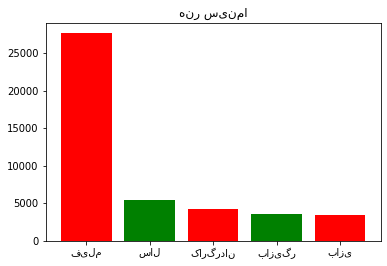

In [144]:
art_and_cinema = dict(reversed(sorted(art_and_cinema.items(), key=lambda item: item[1])))
show_plot(art_and_cinema, "هنر سینما")

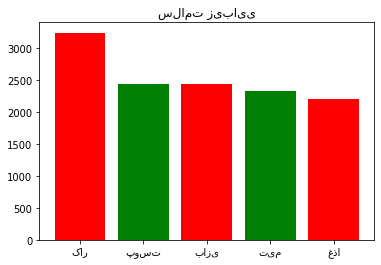

In [145]:
health_and_beauty = dict(reversed(sorted(health_and_beauty.items(), key=lambda item: item[1])))
show_plot(health_and_beauty, "سلامت زیبایی")

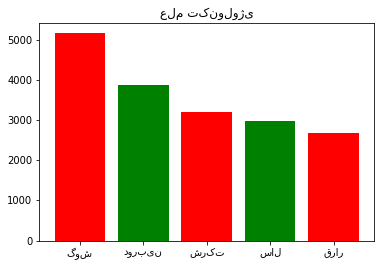

In [146]:
science_and_tech = dict(reversed(sorted(science_and_tech.items(), key=lambda item: item[1])))
show_plot(science_and_tech, "علم تکنولوژی")

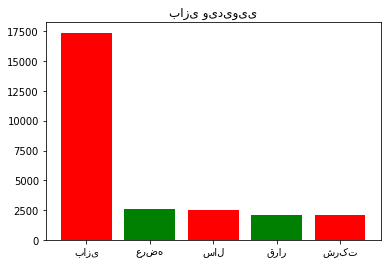

In [147]:
video_game = dict(reversed(sorted(video_game.items(), key=lambda item: item[1])))
show_plot(video_game, "بازی ویدیویی")

In [148]:
art_and_cinema_total_words = sum(art_and_cinema.values())
health_and_beauty_total_words = sum(health_and_beauty.values())
science_and_tech_total_words = sum(science_and_tech.values())
video_game_total_words = sum(video_game.values())

art_and_cinema_total_words, health_and_beauty_total_words, science_and_tech_total_words, video_game_total_words

(465802, 420989, 344627, 273470)

# Phase Three: Evaluation
-----------------

## Q7: Why are the Precision and Recall values each not enough to evaluate the model alone? Give an example for each model in which this criterion is high but the model does not work well.
`precision` equals to <b>what proportion of predicted Positives is truly Positive</b><br/>
`recall` equals to <b>what proportion of actual Positives is correctly classified</b><br/>
TP be real sick man, FP be unreal sick man(actually healthy), TN be real healthy man, FN be unreal healthy man(actually sick)<br/>
recall = TP/(TP+FN)<br/>
precision = TP/(TP+FP)<br/>
TP=5, FN=1, FP=5 ---> Here recall is high but when we want to find out how our thermometer works, recall is not enough, we need precision to know about healthy man who's been recognized as a patient<br/>
TP=5, FN=5, FP=1 ---> Here precision is high but when we want to find out how our thermometer works, precision is not enough, we need recall to know about sick man who's been recognized as a healthy

## Q8:what kind of F1 criterion uses between Precision and Recall? How is it different from normal averaging and why is it important here?
`f1`, which is actually a balanced combination of accuracy and precision criteria, can be used in cases where the cost of FP and FN is different. If the FP and FN costs are approximately equal, the same Accuracy criteria can be used. Also, if your data was unbalanced distributed in the classrooms (for example, if we had 90% of patients and 10% of healthy people), it is better to use the criteria of F1 instead of calculating mean.<br/>F1-score is harmonic mean of precision and recall score and is used as a metrics in the scenarios where choosing either of precision or recall score can result in compromise in terms of model giving high false positives and false negatives respectively

## Q9: Do research about class-multi metrics. Describe  three modes of macro, micro and weighted averaging.
In the <b>multi-class</b> case, we consider all the correctly predicted samples to be True Positives. The majority of classification metrics are defined for binary cases by default. In extending these binary metrics to multiclass, several averaging techniques are used.<br/><br/>
<b>macro-F1</b>: an arithmetic mean of the per-class F1-scores.<br/>
<b>weighted-F1</b>: we weight the F1-score of each class by the number of samples from that class.<br/>
<b>micro-F1</b>: we first compute micro-averaged precision and micro-averaged recall over all the samples , and then combine the two. In this case, the total number of False Negatives is again the total number of prediction errors and The total number of False Positives is  the total number of prediction errors too. So they are equivalent. Since precision=recall in the micro-averaging case, they are also equal to their harmonic mean. In other words, in the micro-F1 case:<br/>
micro-F1 = micro-precision = micro-recall

## Q10: Obtain the criteria for both with additive smoothing and without additive smoothing of the following conditions.

## Probabilities without Additive Smoothing
---------

### Calculate without libs:

In [149]:
labels = ["هنر و سینما", "سلامت و زیبایی", "علم و تکنولوژی", "بازی ویدیویی"]

tp = [0 for i in range(len(labels))]
fp = [0 for i in range(len(labels))]
fn = [0 for i in range(len(labels))]
correct = 0

df_without_smoothing = pd.DataFrame(index = [_ for _ in range(len(df_test.index))])
df_without_smoothing[labels[0]] = np.log(df_train[LABEL].value_counts()["هنر و سینما"] / sum(df_train[LABEL].value_counts()))
df_without_smoothing[labels[1]] = np.log(df_train[LABEL].value_counts()["سلامت و زیبایی"] / sum(df_train[LABEL].value_counts()))
df_without_smoothing[labels[2]] = np.log(df_train[LABEL].value_counts()["علم و تکنولوژی"] / sum(df_train[LABEL].value_counts()))
df_without_smoothing[labels[3]] = np.log(df_train[LABEL].value_counts()["بازی ویدیویی"] / sum(df_train[LABEL].value_counts()))
df_without_smoothing[CORRECT_LABEL] = df_test[LABEL]

for index, row in df_test.iterrows():
    tokens = word_tokenize(row[CONTENT])
    true_label = row[LABEL]
    
    current_increase = [0 for i in range(len(labels))] 
    
    for token in tokens:
        token = lemmatizer.lemmatize(token)
        if token in STOP_WORDS:
            continue
        if '#' in token or '\u200c' in token:
            continue
                    
        
        if token in art_and_cinema:
            temp = np.log(art_and_cinema[token] / art_and_cinema_total_words)
            df_without_smoothing[labels[0]][index] += temp
            current_increase[0] += temp
        else:
            df_without_smoothing[labels[0]][index] += np.log(ZERO)
            current_increase[0] += np.log(ZERO)
            
        if token in health_and_beauty:
            temp = np.log(health_and_beauty[token] / health_and_beauty_total_words)
            df_without_smoothing[labels[1]][index] += temp
            current_increase[1] += temp
        else:
            df_without_smoothing[labels[1]][index] += np.log(ZERO)
            current_increase[1] += np.log(ZERO)
            
        if token in science_and_tech:
            temp = np.log(science_and_tech[token] / science_and_tech_total_words)
            df_without_smoothing[labels[2]][index] += temp
            current_increase[2] += temp
        else:
            df_without_smoothing[labels[2]][index] += np.log(ZERO)
            current_increase[2] += np.log(ZERO)
            
        if token in video_game:
            temp = np.log(video_game[token] / video_game_total_words)
            df_without_smoothing[labels[3]][index] += temp
            current_increase[3] += temp
        else:
            df_without_smoothing[labels[3]][index] += np.log(ZERO)
            current_increase[3] += np.log(ZERO)
            

    max_index = current_increase.index(max(current_increase))

    curr_prediction_label = labels[max_index]
    if curr_prediction_label == df_without_smoothing[CORRECT_LABEL][index]:
        correct += 1
        tp[max_index] += 1
    else:
        fp[max_index] += 1
        fn[labels.index(df_without_smoothing[CORRECT_LABEL][index])] += 1

            
df_without_smoothing[PREDICTION_LABEL] = df_without_smoothing[labels].idxmax(axis = 1)      
            
accuracy = (correct / len(df_without_smoothing)) * 100
precision = [((tp[i] / (tp[i] + fp[i])) * 100) for i in range(len(labels))]
recall = [((tp[i] / (tp[i] + fn[i])) * 100) for i in range(len(labels))]
f1 = [((2 * precision[i] * recall[i]) / (precision[i] + recall[i])) for i in range(len(labels))]  

print("Accuracy: " + str(accuracy))
print(str(labels))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1: " + str(f1))

Accuracy: 93.14214463840399
['هنر و سینما', 'سلامت و زیبایی', 'علم و تکنولوژی', 'بازی ویدیویی']
Precision: [88.29787234042553, 88.8235294117647, 95.47169811320755, 98.88268156424581]
Recall: [99.40119760479041, 93.7888198757764, 91.33574007220217, 89.84771573604061]
F1: [93.52112676056338, 91.23867069486406, 93.35793357933579, 94.14893617021276]


### Calculate with libs:

In [150]:
correct_detected = len(np.where(df_without_smoothing[PREDICTION_LABEL] == df_without_smoothing[CORRECT_LABEL])[0])
total = len(df_without_smoothing)
all_detected_class = [len(df_without_smoothing.loc[df_without_smoothing[PREDICTION_LABEL] == label, PREDICTION_LABEL]) for label in labels]
correct_detected_class = [len(np.where((df_without_smoothing[PREDICTION_LABEL] == df_without_smoothing[CORRECT_LABEL]) & (df_without_smoothing[PREDICTION_LABEL] == label))[0]) for label in labels]
total_class = [len(df_without_smoothing.loc[df_without_smoothing[CORRECT_LABEL] == label, PREDICTION_LABEL]) for label in labels]


accuracy = (correct_detected / total) * 100
precision = [((correct_detected_class[index] / all_detected_class[index]) * 100) for index in range(len(labels))]
recall = [((correct_detected_class[index] / total_class[index]) * 100) for index in range(len(labels))]
f1 = [((2 * precision[index] * recall[index]) / (precision[index] + recall[index])) for index in range(len(labels))]

### Three types of averaging code:

In [151]:
macro = [mean(precision), mean(recall), mean(f1)]
weighted_avg = []
weighted_avg.append(((df_train[LABEL].value_counts()["هنر و سینما"] * precision[0]) + (df_train[LABEL].value_counts()["سلامت و زیبایی"] * precision[1]) + (df_train[LABEL].value_counts()["علم و تکنولوژی"] * precision[2]) + (df_train[LABEL].value_counts()["بازی ویدیویی"] * precision[3])) / (df_train[LABEL].value_counts()["هنر و سینما"] + df_train[LABEL].value_counts()["سلامت و زیبایی"] + df_train[LABEL].value_counts()["علم و تکنولوژی"] + df_train[LABEL].value_counts()["بازی ویدیویی"]))
weighted_avg.append(((df_train[LABEL].value_counts()["هنر و سینما"] * recall[0]) + (df_train[LABEL].value_counts()["سلامت و زیبایی"] * recall[1]) + (df_train[LABEL].value_counts()["علم و تکنولوژی"] * recall[2]) + (df_train[LABEL].value_counts()["بازی ویدیویی"] * recall[3])) / (df_train[LABEL].value_counts()["هنر و سینما"] + df_train[LABEL].value_counts()["سلامت و زیبایی"] + df_train[LABEL].value_counts()["علم و تکنولوژی"] + df_train[LABEL].value_counts()["بازی ویدیویی"]))
weighted_avg.append(((df_train[LABEL].value_counts()["هنر و سینما"] * f1[0]) + (df_train[LABEL].value_counts()["سلامت و زیبایی"] * f1[1]) + (df_train[LABEL].value_counts()["علم و تکنولوژی"] * f1[2]) + (df_train[LABEL].value_counts()["بازی ویدیویی"] * f1[3])) / (df_train[LABEL].value_counts()["هنر و سینما"] + df_train[LABEL].value_counts()["سلامت و زیبایی"] + df_train[LABEL].value_counts()["علم و تکنولوژی"] + df_train[LABEL].value_counts()["بازی ویدیویی"]))
micro = 3 * [((sum(tp) / (df_test[LABEL].value_counts()["هنر و سینما"] + df_test[LABEL].value_counts()["سلامت و زیبایی"] + df_test[LABEL].value_counts()["علم و تکنولوژی"] + df_test[LABEL].value_counts()["بازی ویدیویی"]))) * 100]

In [152]:
pd.DataFrame([precision, recall, f1], columns=labels, index=["Precision", "Recall", "F1"])

,هنر و سینما,سلامت و زیبایی,علم و تکنولوژی,بازی ویدیویی
Precision,88.297872,88.823529,95.471698,98.882682
Recall,99.401198,93.788820,91.335740,89.847716
F1,93.521127,91.238671,93.357934,94.148936


In [153]:
pd.DataFrame([macro, weighted_avg, micro], columns=["Precision", "Recall", "F1"], index=["macro", "weighted_avg", "micro"])

,Precision,Recall,F1
macro,92.868945,93.593368,93.066667
weighted_avg,92.868945,93.593368,93.066667
micro,93.142145,93.142145,93.142145


## Probabilities with Additive Smoothing
---------

### Calculate without libs:

In [154]:
tp = [0 for i in range(len(labels))]
fp = [0 for i in range(len(labels))]
fn = [0 for i in range(len(labels))]
correct = 0
alpha = 1

art_and_cinema_distinct_words = len(list(art_and_cinema.keys()))
science_and_tech_distinct_words = len(list(science_and_tech.keys()))
video_game_distinct_words = len(list(video_game.keys()))
health_and_beauty_distinct_words = len(list(health_and_beauty.keys()))

df_with_smoothing = pd.DataFrame(index = [_ for _ in range(len(df_test.index))])
df_with_smoothing[labels[0]] = np.log(df_train[LABEL].value_counts()["هنر و سینما"] / sum(df_train[LABEL].value_counts()))
df_with_smoothing[labels[1]] = np.log(df_train[LABEL].value_counts()["سلامت و زیبایی"] / sum(df_train[LABEL].value_counts()))
df_with_smoothing[labels[2]] = np.log(df_train[LABEL].value_counts()["علم و تکنولوژی"] / sum(df_train[LABEL].value_counts()))
df_with_smoothing[labels[3]] = np.log(df_train[LABEL].value_counts()["بازی ویدیویی"] / sum(df_train[LABEL].value_counts()))
df_with_smoothing[CORRECT_LABEL] = df_test[LABEL]

for index, row in df_test.iterrows():
    tokens = word_tokenize(row[CONTENT])
    true_label = row[LABEL]
    
    current_increase = [0 for i in range(len(labels))] 
    
    for token in tokens:
        token = lemmatizer.lemmatize(token)
        if token in STOP_WORDS:
            continue
        if '#' in token or '\u200c' in token:
            continue

        temp = np.log((art_and_cinema.get(token, 0) + alpha) / (art_and_cinema_total_words + (alpha * art_and_cinema_distinct_words)))
        df_with_smoothing[labels[0]][index] += temp
        current_increase[0] += temp

        temp = np.log((health_and_beauty.get(token, 0) + alpha) / (health_and_beauty_total_words + (alpha * health_and_beauty_distinct_words)))
        df_with_smoothing[labels[1]][index] += temp
        current_increase[1] += temp

        temp = np.log((science_and_tech.get(token, 0) + alpha) / (science_and_tech_total_words + (alpha * science_and_tech_distinct_words)))
        df_with_smoothing[labels[2]][index] += temp
        current_increase[2] += temp
            
        temp = np.log((video_game.get(token, 0) + alpha) / (video_game_total_words + (alpha * video_game_distinct_words)))
        df_with_smoothing[labels[3]][index] += temp
        current_increase[3] += temp
            

    max_index = current_increase.index(max(current_increase))

    curr_prediction_label = labels[max_index]
    if curr_prediction_label == df_with_smoothing[CORRECT_LABEL][index]:
        correct += 1
        tp[max_index] += 1
    else:
        fp[max_index] += 1
        fn[labels.index(df_without_smoothing[CORRECT_LABEL][index])] += 1

            
df_with_smoothing[PREDICTION_LABEL] = df_with_smoothing[labels].idxmax(axis = 1)      
            
accuracy = (correct / len(df_with_smoothing)) * 100
precision = [((tp[i] / (tp[i] + fp[i])) * 100) for i in range(len(labels))]
recall = [((tp[i] / (tp[i] + fn[i])) * 100) for i in range(len(labels))]
f1 = [((2 * precision[i] * recall[i]) / (precision[i] + recall[i])) for i in range(len(labels))]

### Calculate with libs:

In [155]:
correct_detected = len(np.where(df_with_smoothing[PREDICTION_LABEL] == df_with_smoothing[CORRECT_LABEL])[0])
total = len(df_with_smoothing)
all_detected_class = [len(df_with_smoothing.loc[df_with_smoothing[PREDICTION_LABEL] == label, PREDICTION_LABEL]) for label in labels]
correct_detected_class = [len(np.where((df_with_smoothing[PREDICTION_LABEL] == df_with_smoothing[CORRECT_LABEL]) & (df_with_smoothing[PREDICTION_LABEL] == label))[0]) for label in labels]
total_class = [len(df_with_smoothing.loc[df_with_smoothing[CORRECT_LABEL] == label, PREDICTION_LABEL]) for label in labels]


accuracy = (correct_detected / total) * 100
precision = [((correct_detected_class[index] / all_detected_class[index]) * 100) for index in range(len(labels))]
recall = [((correct_detected_class[index] / total_class[index]) * 100) for index in range(len(labels))]
f1 = [((2 * precision[index] * recall[index]) / (precision[index] + recall[index])) for index in range(len(labels))]

### Three types of averaging code:

In [156]:
macro = [mean(precision), mean(recall), mean(f1)]
weighted_avg = []
weighted_avg.append(((df_train[LABEL].value_counts()["هنر و سینما"] * precision[0]) + (df_train[LABEL].value_counts()["سلامت و زیبایی"] * precision[1]) + (df_train[LABEL].value_counts()["علم و تکنولوژی"] * precision[2]) + (df_train[LABEL].value_counts()["بازی ویدیویی"] * precision[3])) / (df_train[LABEL].value_counts()["هنر و سینما"] + df_train[LABEL].value_counts()["سلامت و زیبایی"] + df_train[LABEL].value_counts()["علم و تکنولوژی"] + df_train[LABEL].value_counts()["بازی ویدیویی"]))
weighted_avg.append(((df_train[LABEL].value_counts()["هنر و سینما"] * recall[0]) + (df_train[LABEL].value_counts()["سلامت و زیبایی"] * recall[1]) + (df_train[LABEL].value_counts()["علم و تکنولوژی"] * recall[2]) + (df_train[LABEL].value_counts()["بازی ویدیویی"] * recall[3])) / (df_train[LABEL].value_counts()["هنر و سینما"] + df_train[LABEL].value_counts()["سلامت و زیبایی"] + df_train[LABEL].value_counts()["علم و تکنولوژی"] + df_train[LABEL].value_counts()["بازی ویدیویی"]))
weighted_avg.append(((df_train[LABEL].value_counts()["هنر و سینما"] * f1[0]) + (df_train[LABEL].value_counts()["سلامت و زیبایی"] * f1[1]) + (df_train[LABEL].value_counts()["علم و تکنولوژی"] * f1[2]) + (df_train[LABEL].value_counts()["بازی ویدیویی"] * f1[3])) / (df_train[LABEL].value_counts()["هنر و سینما"] + df_train[LABEL].value_counts()["سلامت و زیبایی"] + df_train[LABEL].value_counts()["علم و تکنولوژی"] + df_train[LABEL].value_counts()["بازی ویدیویی"]))
micro = 3 * [((sum(tp) / (df_test[LABEL].value_counts()["هنر و سینما"] + df_test[LABEL].value_counts()["سلامت و زیبایی"] + df_test[LABEL].value_counts()["علم و تکنولوژی"] + df_test[LABEL].value_counts()["بازی ویدیویی"]))) * 100]

In [157]:
pd.DataFrame([precision, recall, f1], columns=labels, index=["Precision", "Recall", "F1"])

,هنر و سینما,سلامت و زیبایی,علم و تکنولوژی,بازی ویدیویی
Precision,95.348837,95.031056,95.357143,97.883598
Recall,98.203593,95.031056,96.389892,93.908629
F1,96.755162,95.031056,95.870736,95.854922


In [158]:
pd.DataFrame([macro, weighted_avg, micro], columns=["Precision", "Recall", "F1"], index=["macro", "weighted_avg", "micro"])

,Precision,Recall,F1
macro,95.905158,95.883292,95.877969
weighted_avg,95.905158,95.883292,95.877969
micro,95.885287,95.885287,95.885287


## Q11: Analyze the values obtained in the previous section.
As we seen, additive smoothing increases all average types and also all comparative metrics. It helps model to be more accurate and it works better with test set. All clasees have perfect precision and recall and in result they have perfect f1.

In [159]:
wrong_detected = np.where(df_with_smoothing[PREDICTION_LABEL] != df_with_smoothing[CORRECT_LABEL])[0]

In [160]:
df_with_smoothing.loc[wrong_detected[:10]]

,هنر و سینما,سلامت و زیبایی,علم و تکنولوژی,بازی ویدیویی,correct_label,prediction_label
50,-996.624732,-1044.524996,-924.569995,-942.825034,هنر و سینما,علم و تکنولوژی
53,-2407.178159,-2227.073074,-1893.621293,-1941.910244,بازی ویدیویی,علم و تکنولوژی
87,-1654.398643,-1613.402721,-1482.125526,-1509.938290,بازی ویدیویی,علم و تکنولوژی
105,-1396.487588,-1348.340713,-1353.598016,-1396.123890,علم و تکنولوژی,سلامت و زیبایی
173,-857.722716,-825.927814,-857.445010,-821.613716,علم و تکنولوژی,بازی ویدیویی
202,-1467.970838,-1714.343293,-1729.323323,-1459.836347,هنر و سینما,بازی ویدیویی
305,-4216.025640,-3842.958331,-4177.875438,-3937.530601,بازی ویدیویی,سلامت و زیبایی
328,-2303.186834,-2382.877007,-2340.267282,-2399.612152,علم و تکنولوژی,هنر و سینما
357,-1226.266047,-1356.006942,-1354.824019,-1235.806949,سلامت و زیبایی,هنر و سینما
381,-1237.697945,-1318.110722,-1257.095618,-1255.477981,علم و تکنولوژی,هنر و سینما


In [161]:
df_test.loc[wrong_detected[:10]]

,content,label
50,دیزنی به کمک دوربین‌های نوکیا، محتوای واقعیت م...,هنر و سینما
53,Ryzen Threadripper: قوی‌ترین پردازنده‌های AMD ...,بازی ویدیویی
87,افزایش قیمت پلی‌استیشن، یکی از نتایج جنگ تجاری...,بازی ویدیویی
105,عربستان زنان فراری از کشور را با شماره سریال گ...,علم و تکنولوژی
173,همه چیز درباره ارزش پول (داستان پول – قسمت ۵) ...,علم و تکنولوژی
202,تریلر جدید سریال The Walking Dead مقدمه‌ای برا...,هنر و سینما
305,بهترین ترکیب‌های PES ۲۰۲۰ کدام هستند؟ اگر اهل ...,بازی ویدیویی
328,اصغر قندچی؛ مستند آن مرد با ماک آمد (قسمت دوم)...,علم و تکنولوژی
357,لگوی Ghost Busters از تابستان وارد بازار می‌شو...,سلامت و زیبایی
381,بت موبیل فروشی شد؛ خودرو بت من با موتور جت و م...,علم و تکنولوژی


## Q12: 5 articles that are in the test data and your model has identified the wrong category for them. What part or parts of the solution do you think led us to misdiagnose these issues?
At first, we can see that the correct label probability and the prediction label probability are very close to each other in these five samples.<br/>
If we increase our training set and add more articles, the model almost will be more accurate.<br/>
If we weigh more common words, the model will be better. In our model, it weigh to all words as same to each other.<br/>
Some words like بازی have high frequency in several labels and we should handle it and weigh exclusive words to each label.